# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [95]:
import pandas as pd

In [96]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [97]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [98]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [99]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(df_seoul_bus_station.head(5))
display(df_seoul_moving.head(5))
display(df_seoul_business.head(5))
display(df_seoul_people.head(5))

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996


,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
0,11010,60.151307,41.911289,29075578,20258827.46,65,33818
1,11010,60.151307,41.911289,29075578,20258827.46,70,26200
2,11010,60.151307,41.911289,29075578,20258827.46,75,20342
3,11010,60.151307,41.911289,29075578,20258827.46,80,16148
4,11020,58.450528,44.128266,28733286,21692705.49,65,34257


,자치구,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,종로구,215,215,1548,5912,618,646,549,889,261,...,948,3613,400,962,537,1413,110,382,437,1982
1,중구,230,235,1588,6414,300,333,576,1152,339,...,869,3542,10810,24248,381,982,57,175,443,2121
2,용산구,416,523,857,2987,455,466,791,1214,366,...,634,2076,54,317,487,1332,104,573,300,1184
3,성동구,1200,2527,956,2785,1072,1161,801,1453,489,...,547,1859,149,1572,285,621,258,1494,400,1545
4,광진구,1119,1744,963,2861,968,985,871,1313,746,...,590,1887,89,687,633,1577,413,1646,467,1678


,자치구,남자,여자,합계,65세 이상
0,종로구,71890,78563,150453,28764
1,중구,63495,68298,131793,25920
2,용산구,109826,117280,227106,39747
3,성동구,137620,147146,284766,49462
4,광진구,167562,183618,351180,56819


In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [102]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [103]:
df

,도착 시군구 코드,자치구,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,...,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
0,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818
1,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200
2,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342
3,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148
4,11020,중구,63495,68298,131793,25920,230,235,1588,6414,...,3138112,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11240,송파구,316981,343044,660025,108894,2638,4850,1575,5760,...,4746623,4744766,99.003483,98.964751,71.786619,79.389856,33877900,37466057.70,80,12661
96,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2515582,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,65,26278
97,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2515582,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,70,19986
98,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2515582,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,75,14786


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          100 non-null    int64  
 1   자치구                100 non-null    object 
 2   남자                 100 non-null    int64  
 3   여자                 100 non-null    int64  
 4   합계                 100 non-null    int64  
 5   65세 이상             100 non-null    int64  
 6   택시운송업              100 non-null    int64  
 7   택시운송업.1            100 non-null    int64  
 8   한식 일반 음식점업         100 non-null    int64  
 9   한식 일반 음식점업.1       100 non-null    int64  
 10  용달 화물자동차 운송업       100 non-null    int64  
 11  용달 화물자동차 운송업.1     100 non-null    int64  
 12  부동산 중개 및 대리업       100 non-null    int64  
 13  부동산 중개 및 대리업.1     100 non-null    int64  
 14  두발미용업              100 non-null    int64  
 15  두발미용업.1            100 non-null    int64  
 16  커피전문점              100 non-

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
    - 이동인구와 정류장 수가 연관이 있나? -> 있다면 이동인구 높은데 정류장 수 적은 구역이 있나? 그 이유는 뭘까?

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [105]:
df.describe()

,도착 시군구 코드,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,...,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,11130.000000,185977.84000,199574.120000,385551.960000,69747.840000,1887.040000,3068.040000,1169.000000,4007.320000,1139.760000,...,4.110994e+06,4.029876e+06,107.525945,105.372406,64.262511,47.605192,2.762930e+07,2.100957e+07,72.500000,20199.330000
std,72.474308,59630.20591,64379.784579,123832.161402,20988.924661,1133.310356,1933.186107,392.205368,2100.165837,471.752827,...,1.141216e+06,1.121219e+06,15.005367,14.754595,4.176839,13.680877,3.665977e+06,8.533010e+06,5.618332,7321.574131
min,11010.000000,63495.00000,68298.000000,131793.000000,25920.000000,215.000000,215.000000,672.000000,2009.000000,300.000000,...,2.365355e+06,2.331836e+06,79.082866,77.969784,58.450528,30.076522,1.996610e+07,8.908425e+06,65.000000,6146.000000
25%,11070.000000,149675.00000,159819.000000,309494.000000,57895.000000,1119.000000,1838.000000,867.000000,2663.000000,802.000000,...,3.200879e+06,3.155827e+06,95.578543,92.738804,60.975391,38.834441,2.572271e+07,1.631436e+07,68.750000,14413.500000
50%,11130.000000,189462.00000,202091.000000,389714.000000,70436.000000,1713.000000,2589.000000,991.000000,2987.000000,1281.000000,...,4.125466e+06,3.979142e+06,108.467845,108.267985,64.032968,42.697635,2.727945e+07,1.851737e+07,72.500000,19852.500000
75%,11190.000000,223330.00000,237081.000000,463318.000000,82984.000000,2757.000000,4850.000000,1411.000000,4705.000000,1528.000000,...,4.746623e+06,4.744766e+06,119.962938,117.447907,67.409332,51.623977,2.907558e+07,2.338633e+07,76.250000,26026.000000
max,11250.000000,316981.00000,343044.000000,660025.000000,108894.000000,4114.000000,6922.000000,2415.000000,11486.000000,1910.000000,...,6.960336e+06,6.597087e+06,134.946712,138.040996,72.597698,88.589932,3.727976e+07,5.003178e+07,80.000000,38034.000000


In [106]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

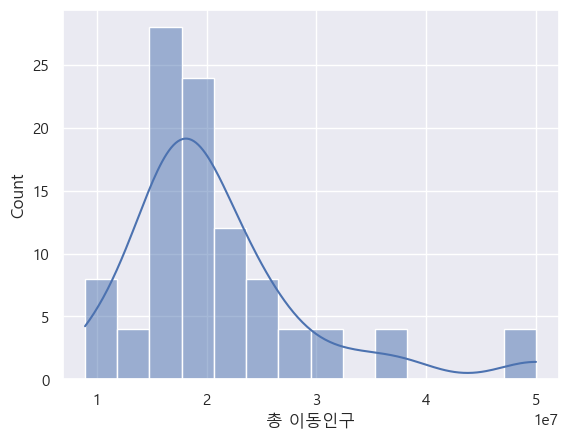

In [107]:
sns.histplot(df['총 이동인구'], kde = True)
plt.show()

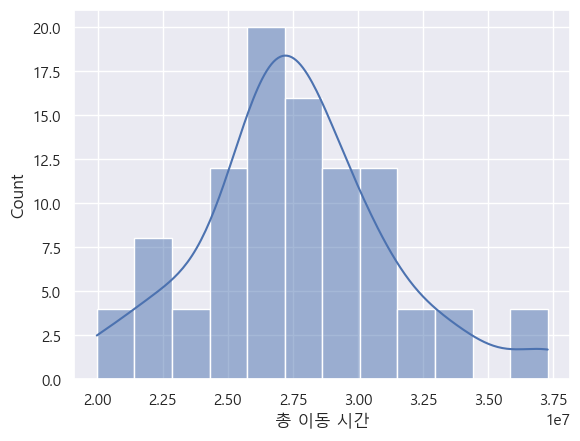

In [108]:
sns.histplot(df['총 이동 시간'], kde = True)
plt.show()

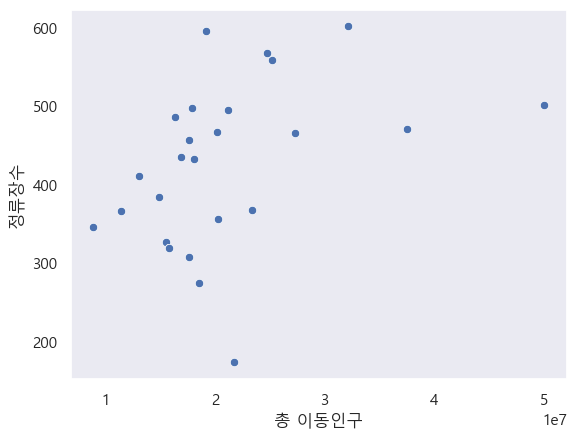

In [109]:
sns.scatterplot(x = '총 이동인구', y = '정류장수', data = df)
plt.grid()
plt.show()

In [110]:
spst.pearsonr(df['총 이동인구'], df['정류장수'])

PearsonRResult(statistic=0.399865757981578, pvalue=3.7607298868869534e-05)

-> 총 이동인구와 정류장수는 중간 정도의 상관관계를 가짐

In [111]:
df['승하차 총 승객수'] = df['승차총승객수']+df['하차총승객수']

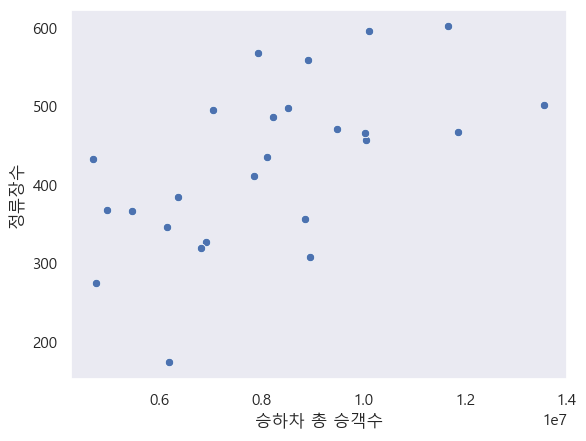

In [112]:
sns.scatterplot(x = '승하차 총 승객수', y = '정류장수', data = df)
plt.grid()
plt.show()

In [113]:
spst.pearsonr(df['승하차 총 승객수'], df['정류장수'])

PearsonRResult(statistic=0.5909168403610836, pvalue=9.670136634106063e-11)

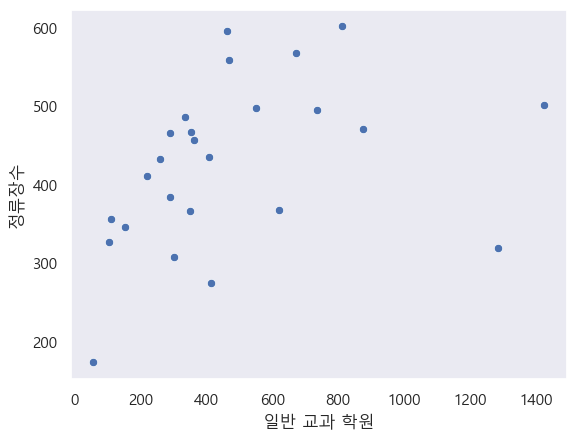

In [120]:
sns.scatterplot(x = '일반 교과 학원', y = '정류장수', data = df)
plt.grid()
plt.show()
'''
for i in range(len(df)):
    ax.text(df['정류장당 인구수'][i], df['노선수'][i], df['자치구'][i], ha='left')
'''

In [121]:
spst.pearsonr(df['일반 교과 학원'], df['정류장수'])

PearsonRResult(statistic=0.3706511476647472, pvalue=0.00014701916274046097)

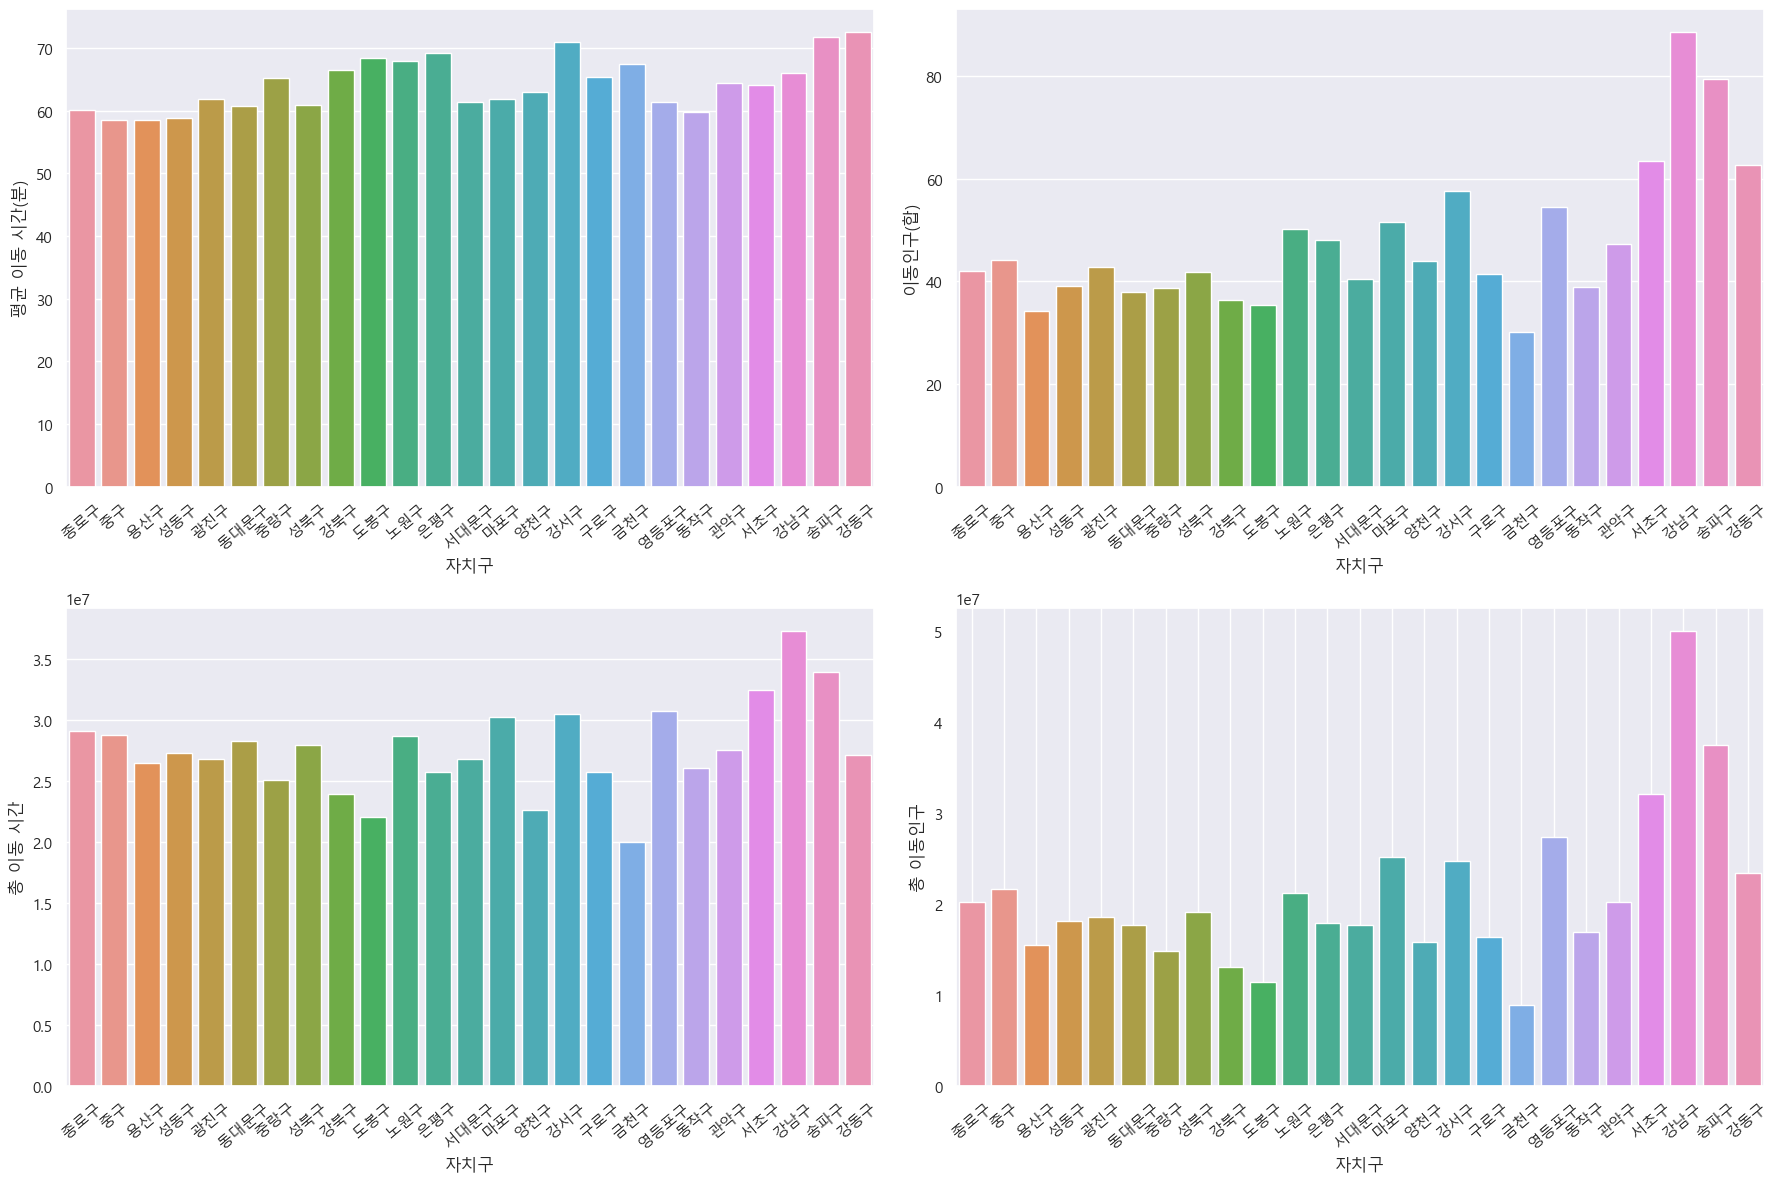

In [122]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="평균 이동 시간(분)", data=df)

plt.subplot(2, 2, 2)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="이동인구(합)", data=df)

plt.subplot(2, 2, 3)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="총 이동 시간", data=df)

plt.subplot(2, 2, 4)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="총 이동인구", data=df)

plt.tight_layout()
plt.grid()
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [123]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

In [124]:
temp = df.drop(['자치구'], axis=1)
temp

,도착 시군구 코드,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,...,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구,승하차 총 승객수
0,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818,8849230
1,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200,8849230
2,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342,8849230
3,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148,8849230
4,11020,63495,68298,131793,25920,230,235,1588,6414,300,...,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257,6188757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11240,316981,343044,660025,108894,2638,4850,1575,5760,1910,...,4744766,99.003483,98.964751,71.786619,79.389856,33877900,37466057.70,80,12661,9491389
96,11250,226237,237081,463318,82984,3295,4980,1101,3388,1528,...,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,65,26278,4976487
97,11250,226237,237081,463318,82984,3295,4980,1101,3388,1528,...,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,70,19986,4976487
98,11250,226237,237081,463318,82984,3295,4980,1101,3388,1528,...,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,75,14786,4976487


In [160]:
# 업종별 사업체
stores = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점']]

In [161]:
# 업종별 종사자
workers = df[['택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1', '두발미용업.1',  '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1', '한식 육류요리 전문점.1']]

In [178]:
stores_bus_station = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '정류장수']]

In [179]:
stores_work_route = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '노선수']]

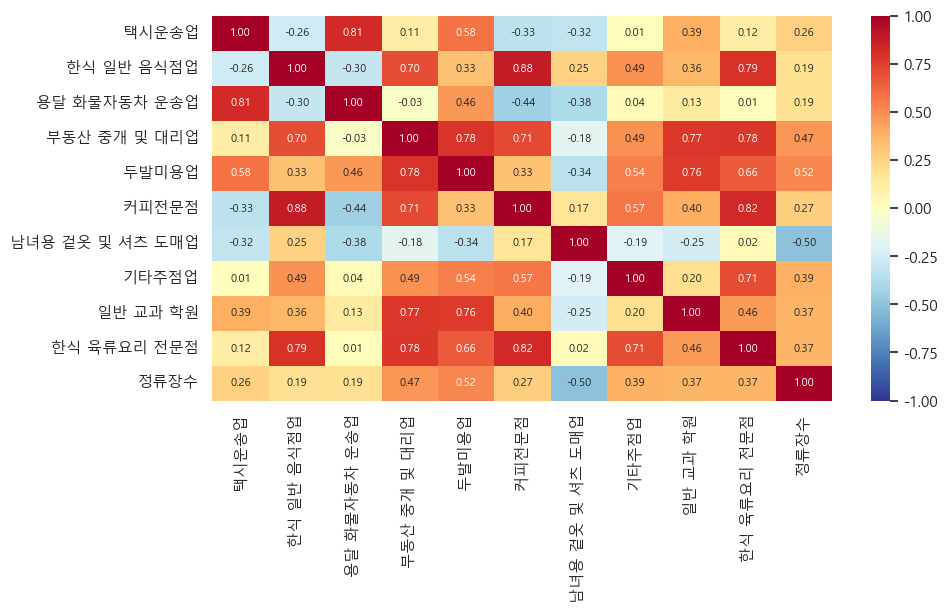

In [190]:
plt.figure(figsize = (10, 5))
sns.heatmap(stores_bus_station.corr(), annot = True, fmt = '.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, cmap = 'RdYlBu_r')
plt.show()

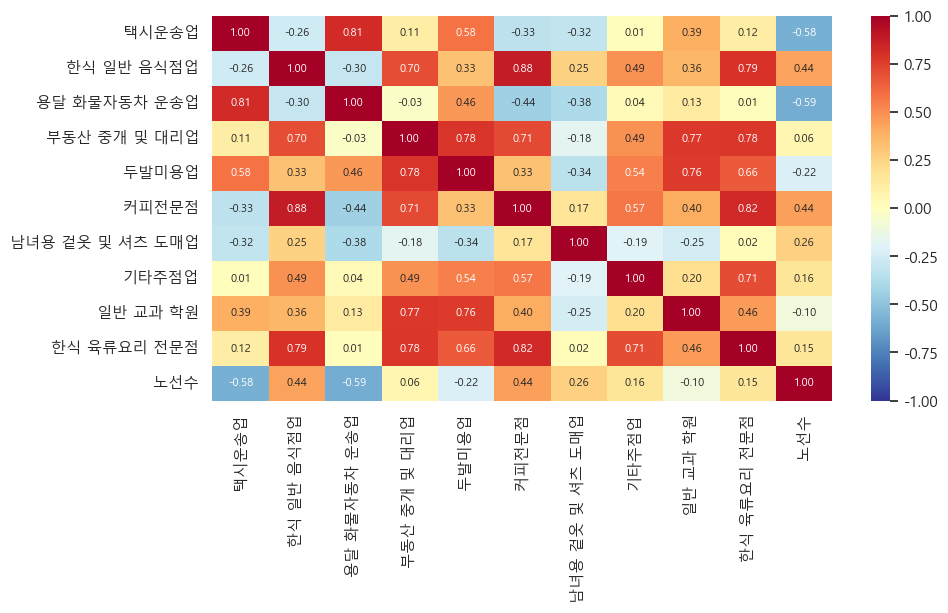

In [191]:
plt.figure(figsize = (10, 5))
sns.heatmap(stores_work_route.corr(), annot = True, fmt = '.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, cmap = 'RdYlBu_r')
plt.show()

In [183]:
for store in stores:
    print(store+'과 정류장 수 간의 상관계수: ', spst.pearsonr(df[store], df['정류장수']), end='\n')
    print(store+'과 노선 수 간의 상관계수: ', spst.pearsonr(df[store], df['노선수']), end='\n')

택시운송업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5815497068488676, pvalue=2.229030398439256e-10)
한식 일반 음식점업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.4367372205421086, pvalue=5.552792969791957e-06)
용달 화물자동차 운송업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5939999426388506, pvalue=7.303003454171986e-11)
부동산 중개 및 대리업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.06042189414337566, pvalue=0.5503949498150549)
두발미용업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.2213363838145403, pvalue=0.02689339591169801)
커피전문점과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.439347800834543, pvalue=4.807540227681963e-06)
남녀용 겉옷 및 셔츠 도매업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.2595537449448559, pvalue=0.00911372388225878)
기타주점업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.15712506666890114, pvalue=0.11847410932206455)
일반 교과 학원과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.0985937798748362, pvalue=0.32910290404770376)
한식 육류요리 전문점과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.1506937140761162, pvalue=0.13451002401118758)


In [157]:
for worker in workers:
    print(worker+'과 정류장 수 간의 상관계수: ', spst.pearsonr(df[worker], df['정류장수']), end='\n')
    print(worker+'과 노선 수 간의 상관계수: ', spst.pearsonr(df[worker], df['노선수']), end='\n')

택시운송업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.23023371369218495, pvalue=0.0211978781332088)
택시운송업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.6367235949028305, pvalue=1.0752926367663832e-12)
한식 일반 음식점업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.1735321295788329, pvalue=0.084234194822604)
한식 일반 음식점업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.4563275673579189, pvalue=1.8279459433719476e-06)
용달 화물자동차 운송업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.20099893236437527, pvalue=0.044938136573358496)
용달 화물자동차 운송업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5864045276263649, pvalue=1.4507291547430056e-10)
부동산 중개 및 대리업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.356785624858486, pvalue=0.00026876353990779397)
부동산 중개 및 대리업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.12990109458710303, pvalue=0.19769557872035023)
두발미용업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.3671097619789676, pvalue=0.00017195763476862783)
두발미용업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.1655126910384867

## 4.관계 정리

업종 사업체와 노선 수와의 관계
- 강한 관계: 택시 운송업, 용달 화물자동차 운송업
- 중간 관계: 한식 일반 음식점, 커피전문점, 의류 도매업, 
- 약한 관계: -
- 관계 X: 부동산 중개 및 대리업, 두발미용업, 기타주점업,
        일반 교과 학원, 한식 육류요리 전문점

업종 사업체와 정류장 수와의 관계
- 강한 관계: 두발미용업, 의류 도매업
- 중간 관계: 택시 운송업, 부동산 중개 및 대리업, 기타주점업,
             일반 교과 학원, 한식 육류요리 전문점
- 약한 관계: 용달 화물자동차 운송업, 
- 관계 X: 한식 일반 음식점, 커피전문점

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.